# Data Exploration

The data exploration is about fines in the city of Cologne. The two datasets which are going to be analyzed are from the year 2016 and january 2018, however the analysis focuses on the months january only. 

## Install dependencies

In [ ]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load fine data

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df16 = pd.read_sql_table('fine16', 'sqlite:///data/fine_data.sqlite')
df18 = pd.read_sql_table('fine18', 'sqlite:///data/fine_data.sqlite')

### Look at the first rows

In [3]:
df16.head(10)

,jahr,monat,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2016,1,2016-01-21 11:15:00.000,K,PKW,OPEL,FRANKFURTER STR.,70,141322,None,None
1,2016,1,2016-01-21 11:52:00.000,LEV,PKW,OPEL,GRAF-ADOLF-STR.,64,113140,None,None
2,2016,1,2016-01-21 10:28:00.000,K,PKW,JAGUAR,JAN-WELLEM-STR.,None,113140,None,None
3,2016,1,2016-01-21 10:20:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
4,2016,1,2016-01-21 09:14:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
5,2016,1,2016-01-21 08:33:00.000,K,PKW,VW-VOLKSWAGEN,GRONAUER STR.,43-45,112403,None,None
6,2016,1,2016-01-26 08:00:00.000,K,PKW,RENAULT,JOSEPHSKIRCHSTR.,58,142103,None,None
7,2016,1,2016-01-26 07:24:00.000,K,PKW,FIAT,WIPPERFÜRTHER STR.,None,112402,None,None
8,2016,1,2016-01-25 16:23:00.000,K,PKW,MERCEDES,SIEVERSSTR.,36,141312,None,None
9,2016,1,2016-01-25 16:34:00.000,K,PKW,VOLVO,DILLENBURGER STR.,None,141621,None,None


In [4]:
df18.head(10)

,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2018-01-06 10:44:00.000,WÜ,PKW,AUDI,GUSTAVSTR.,56,141322,None,None
1,2018-01-06 10:44:00.000,BN,PKW,MAZDA,GUSTAVSTR.,56,141322,None,None
2,2018-01-06 10:38:00.000,NE,PKW,BMW,ZÜLPICHER STR.,311,141322,None,None
3,2018-01-06 10:40:00.000,K,PKW,HONDA,ZÜLPICHER STR.,None,141245,None,None
4,2018-01-29 10:48:00.000,K,PKW,RENAULT,BRÜSSELER STR.,None,113141,None,None
5,2018-01-29 10:48:00.000,BN,PKW,MERCEDES,BRÜSSELER STR.,None,113141,None,None
6,2018-01-29 10:45:00.000,HH,PKW,VW-VOLKSWAGEN,AACHENER STR.,33,141322,None,None
7,2018-01-29 10:32:00.000,K,PKW,AUDI,AACHENER STR.,None,141322,None,None
8,2018-01-29 10:45:00.000,K,PKW,BMW,AACHENER STR.,29,141322,None,None
9,2018-01-05 08:30:00.000,K,PKW,PEUGEOT,SÜLZBURGSTR.,172,141322,None,None


### Data exploration
Some basic information about the data.

#### Dataset 1: Fine Data of Cologne in 2016 

In [24]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921353 entries, 0 to 921352
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   jahr          921353 non-null  int64 
 1   monat         921353 non-null  int64 
 2   datum_von     921353 non-null  object
 3   kennzeichen1  921338 non-null  object
 4   fahrzeugart   921353 non-null  object
 5   fabrikat      920202 non-null  object
 6   strasse       921353 non-null  object
 7   hausnummer    618864 non-null  object
 8   tatbestand1   921353 non-null  object
 9   tatbestand2   47189 non-null   object
 10  tatbestand3   3605 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.3+ MB


Get rid of unessecary data and rows with missing data.

In [45]:
for number in range(2, 13): 
    df16 = df16[df16.monat != number]

df16 = df16.drop(["jahr", "monat", "datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df16 = df16.dropna()
df16.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,80660,80660,80660,80660
unique,13,88,2328,243
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,78923,13712,2446,31548


In [35]:
df16["tatbestand1"].value_counts()

tatbestand1
113140      31548
141312      10473
141322       6678
112402       3709
142103       2229
            ...  
970121          1
142233          1
141116.B        1
141333          1
112100.A        1
Name: count, Length: 243, dtype: int64

<Axes: xlabel='fabrikat', ylabel='count'>

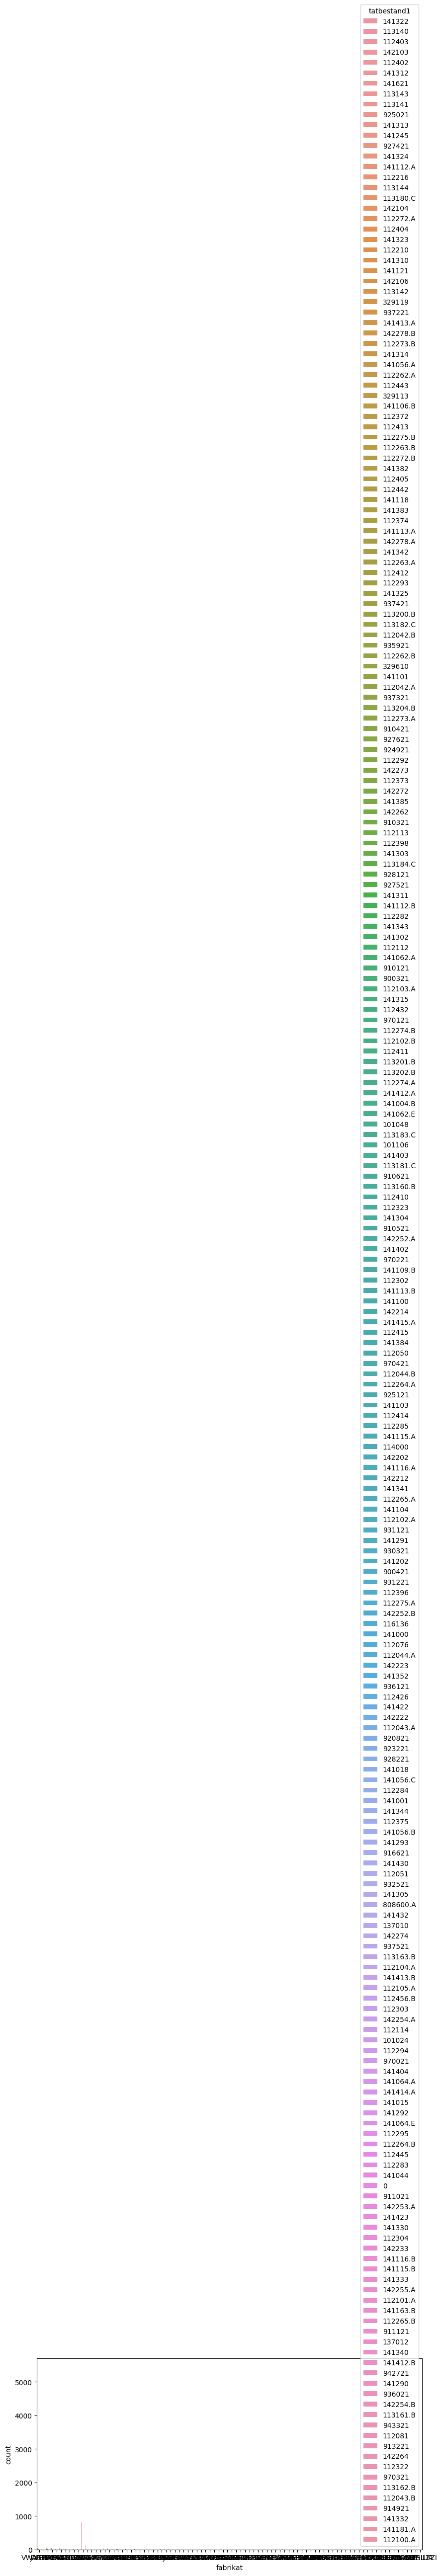

In [48]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'fabrikat', hue='tatbestand1', data = df16)

#### Dataset 2: Fine Data of Cologne in 2018 


In [7]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73226 entries, 0 to 73225
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datum_von     73226 non-null  object
 1   kennzeichen1  73225 non-null  object
 2   fahrzeugart   73226 non-null  object
 3   fabrikat      73178 non-null  object
 4   strasse       73226 non-null  object
 5   hausnummer    49757 non-null  object
 6   tatbestand1   73226 non-null  object
 7   tatbestand2   4560 non-null   object
 8   tatbestand3   311 non-null    object
dtypes: object(9)
memory usage: 5.0+ MB


Get rid of unessecary data and rows with missing data.

In [46]:
df18 = df18.drop(["datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df18 = df18.dropna()
df18.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,73178,73178,73178,73178
unique,15,86,2416,212
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,71139,12800,2368,27848


In [36]:
df18["tatbestand1"].value_counts()

tatbestand1
113140      27854
141312      10340
141322       6071
112402       3770
142103       1738
            ...  
141000          1
142107          1
925221          1
112434          1
142254.A        1
Name: count, Length: 213, dtype: int64